In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import skmisc

adata = sc.read_h5ad("cache/pbmc3k_tut.h5ad")
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'counts'

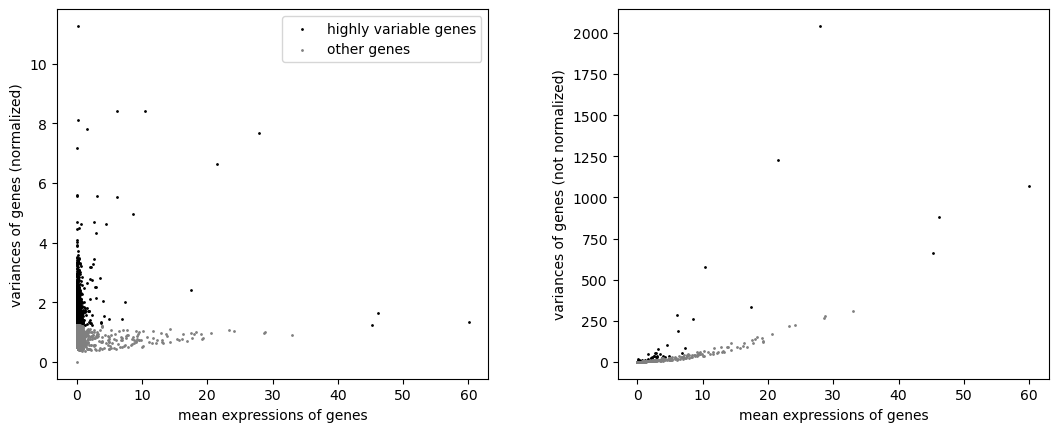

In [2]:
# feature selection

sc.pp.highly_variable_genes(
    adata,
    layer="counts",
    n_top_genes=2000,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    flavor="seurat_v3",
)

sc.pl.highly_variable_genes(adata)

In [3]:
### 가장 최신 분석 workflow에서는, pattern loss가 있기 때문에 regress_out은 하지 않음

adata.layers["scaled"] = adata.X.toarray()
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"], layer="scaled")
sc.pp.scale(adata, max_value=10, layer="scaled")

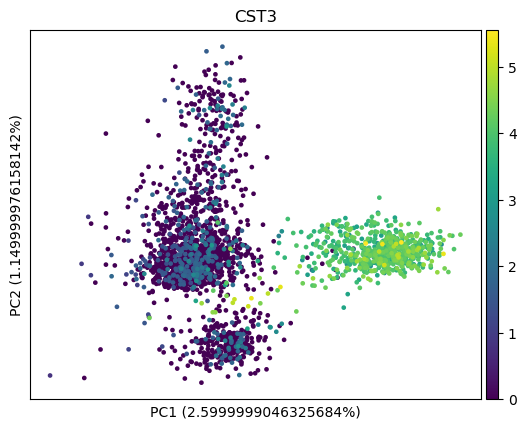

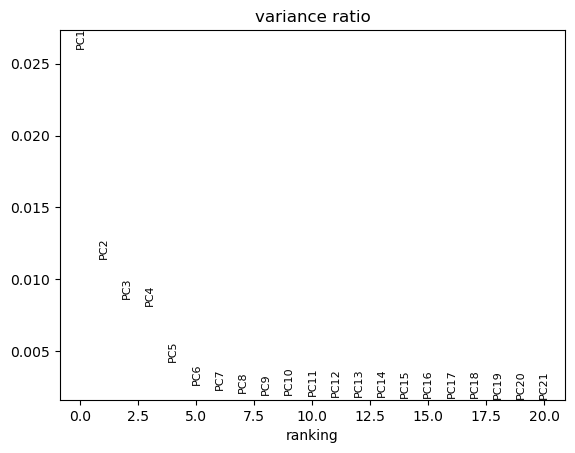

In [4]:
sc.pp.pca(adata, layer="scaled", svd_solver="arpack")
sc.pl.pca(adata, annotate_var_explained=True, color="CST3")
sc.pl.pca_variance_ratio(adata, n_pcs=20)

In [5]:
adata.write("cache/pbmc3k_tut.h5ad")